# Project 3: Clustering - Mall Customer Segmentation 

## Dataset: 

Mall Customer Segmentation Dataset (available from Kaggle)

## Analysis Goals:

1. Data Preprocessing:
    - Handle missing values, if any, using appropriate techniques such as imputation or dropping.
    - Normalize numerical features using StandardScaler or MinMaxScaler.

2. Exploratory Data Analysis (EDA):
    - Visualize feature distributions: Use histograms or box plots to understand the distribution of features like age, annual income, and spending score.
    - Explore relationships between variables: Use scatter plots or pair plots to identify potential correlations or patterns.

3. Feature Engineering:
    - Identify relevant features: Select features such as age, annual income, and spending score for customer segmentation.

4. Dimensionality Reduction:
    - Apply PCA: Reduce the dimensionality of the feature space if there are many features.
    - Visualize reduced dimensions: Use scatter plots or heatmaps to visualize the reduced dimensions and understand feature importance.

5. Clustering:
    - Algorithms: Use KMeans and DBSCAN for clustering.
    - Determine the optimal number of clusters:
        - Elbow method: Plot the sum of squared distances (inertia) against the number of clusters and identify the "elbow" point where the inertia starts decreasing at a slower rate.
        - Silhouette score: Calculate the silhouette score for different numbers of clusters and choose the one with the highest score.

6. Cluster Analysis:
    - Analyze cluster characteristics:
        - Centroids: For KMeans, analyze the centroid of each cluster to understand the cluster's characteristics.
        - Cluster means: For both KMeans and DBSCAN, calculate the mean values of features within each cluster.
    - Visualize clusters:
        - Scatter plots: Visualize clusters in the reduced feature space to understand their distribution and separability.
    - Heatmaps: Visualize the mean values of features within each cluster using heatmaps.

7. Model Evaluation:
    - Evaluate clustering performance:
        - Silhouette score: Measure how similar an object is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined clusters.
        - Davies–Bouldin index: Measure the average similarity between each cluster and its most similar cluster, where lower values indicate better clustering.
    - Visualize clustering results:
        - Scatter plots: Plot the data points colored by their assigned cluster labels to visualize the clustering results.
        - Evaluate cluster separability and compactness.

## Analysis

### Load Data

| Column Name         | Description                                               |
|---------------------|-----------------------------------------------------------|
| CustomerID          | Unique ID assigned to the customer                        |
| Gender              | Gender of the customer                                    |
| Age                 | Age of the customer                                       |
| Annual Income (k$) | Annual Income of the customer                             |
| Spending Score      | Score assigned by the mall based on customer behavior and spending nature (1-100) |


In [1]:
import pandas as pd
df = pd.read_csv('data/Mall_Customers.csv')
df = df.drop(columns=('CustomerID'))
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Data Preprocessing

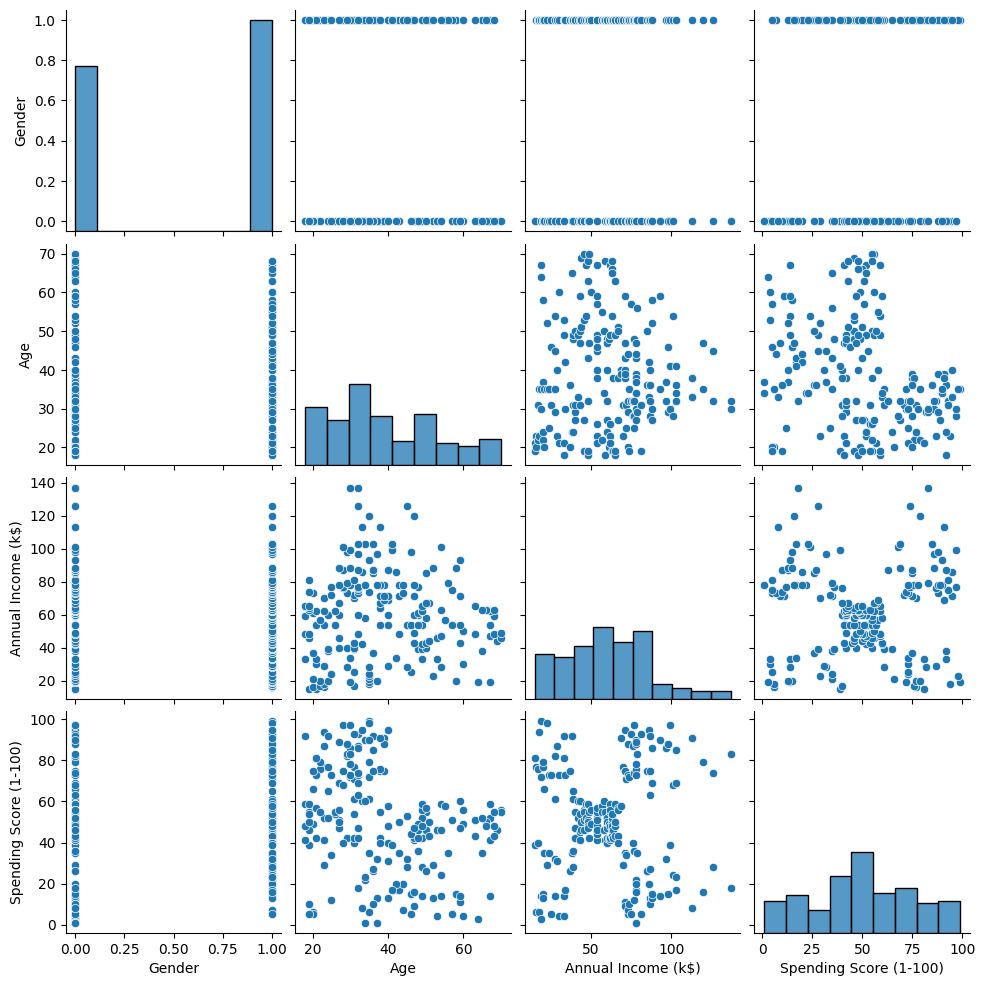

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


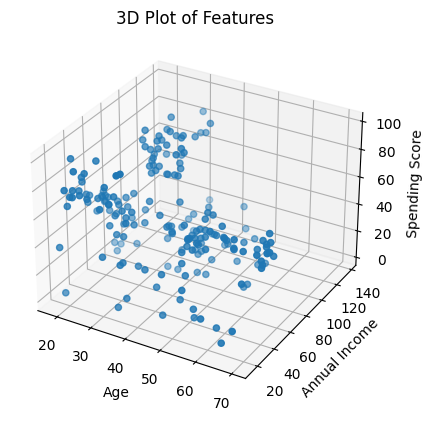

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(df.columns)

# Assuming 'feature1', 'feature2', and 'feature3' are the names of the three features you want to visualize
feature1 = df['Age']
feature2 = df['Annual Income (k$)']
feature3 = df['Spending Score (1-100)']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(feature1, feature2, feature3)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Plot of Features')

plt.show()

Eigenvalues:
PC 1: 1.3346583077862828
PC 2: 1.0042727174328374
PC 3: 0.6761443516653018


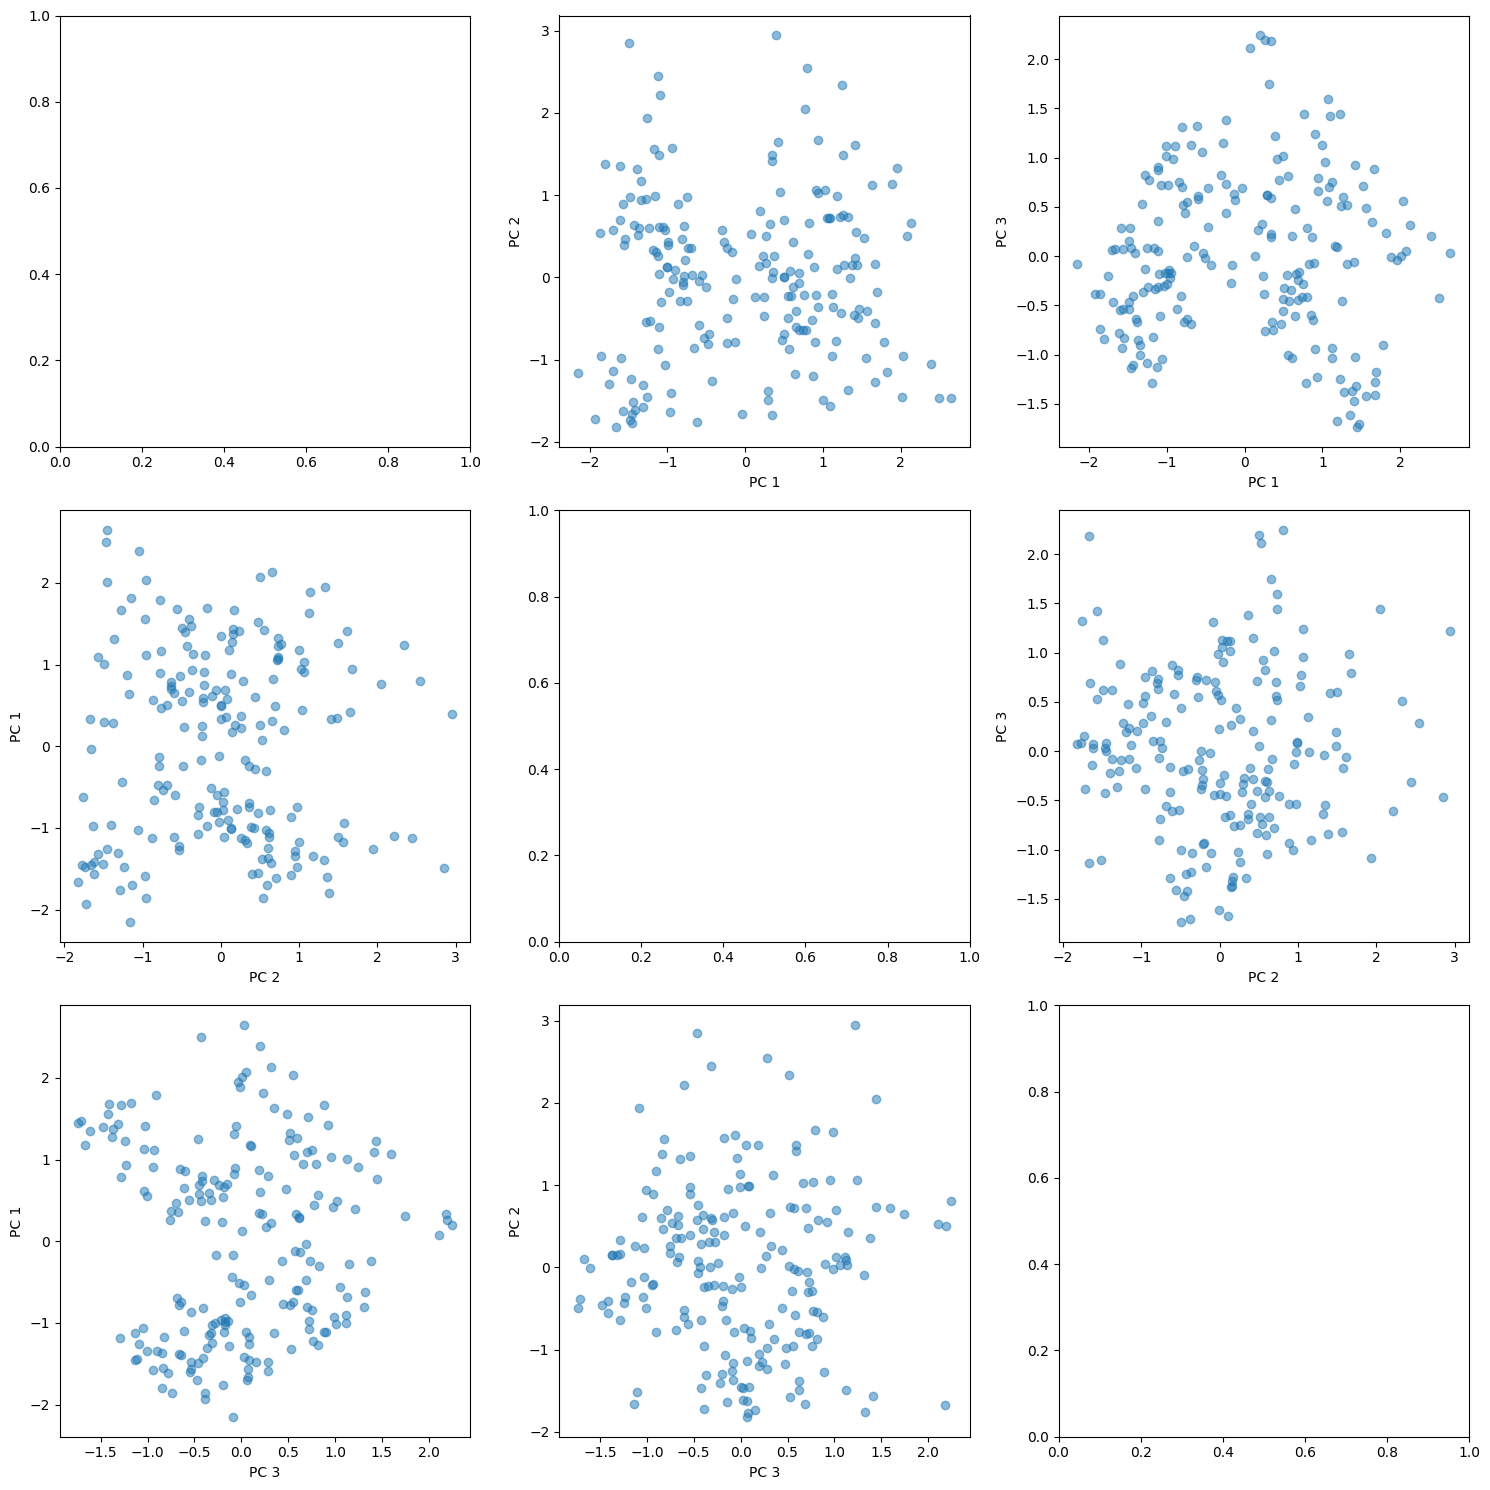

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

df = df.drop(columns=('Gender'))
# Standardize the features by scaling them
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA()

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Transform the data to its principal components
pca_data = pca.transform(scaled_data)

# Create a new DataFrame with the principal components
# You may want to assign meaningful column names based on the components
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, pca_data.shape[1] + 1)])

# Print out the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(pca.explained_variance_):
    print(f'PC {i+1}: {eigenvalue}')


# Plot eigenvector i vs j for all eigenvector pairs
num_eigenvectors = min(6, pca_data.shape[1])  # Number of eigenvectors to plot (limit to 6 for clarity)
fig, axs = plt.subplots(num_eigenvectors, num_eigenvectors, figsize=(5*num_eigenvectors, 5*num_eigenvectors))

for i in range(num_eigenvectors):
    for j in range(num_eigenvectors):
        if i != j:  # Exclude plotting eigenvector against itself
            ax = axs[i, j]
            ax.scatter(pca_data[:, i], pca_data[:, j], alpha=0.5)
            ax.set_xlabel(f'PC {i+1}')
            ax.set_ylabel(f'PC {j+1}')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


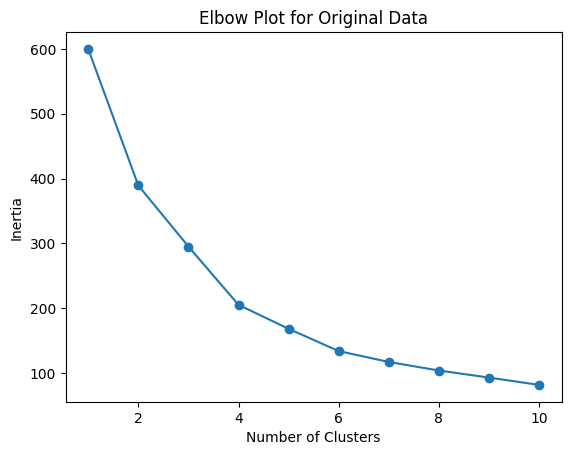

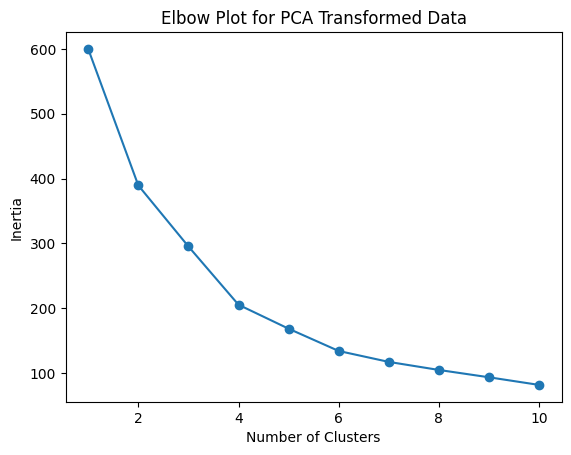

In [5]:
# Elbow plot for original data
inertia_original = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_data)
    inertia_original.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_original, marker='o')
plt.title('Elbow Plot for Original Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Elbow plot for PCA transformed data
inertia_pca = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pca_data)
    inertia_pca.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_pca, marker='o')
plt.title('Elbow Plot for PCA Transformed Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_silhouette_analysis(data, min_clusters, max_clusters, ncols=2):
    """
    Plot silhouette plots over a range of cluster numbers in one figure with multiple panels.
    
    Parameters:
        data (array-like): The data to be clustered.
        min_clusters (int): The minimum number of clusters to consider.
        max_clusters (int): The maximum number of clusters to consider.
        ncols (int): Number of columns for subplots. Default is 2.
    """
    nrows = np.ceil((max_clusters - min_clusters + 1) / ncols).astype(int)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6 * nrows))
    axes = axes.flatten()
    
    for n_clusters, ax in zip(range(min_clusters, max_clusters + 1), axes):
        # Cluster your data using KMeans
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(data)

        # Compute silhouette coefficients for each sample in your data
        silhouette_vals = silhouette_samples(data, kmeans.labels_, metric='euclidean')

        # Get unique cluster labels
        cluster_labels = np.unique(kmeans.labels_)

        # Initialize variables to determine y-axis limits and tick positions
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []

        # Plot silhouette coefficients for each cluster
        for i, c in enumerate(cluster_labels):
            # Extract silhouette coefficients for the current cluster
            c_silhouette_vals = silhouette_vals[kmeans.labels_ == c]
            c_silhouette_vals.sort()

            # Determine y-axis limits and tick positions
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i) / n_clusters)
            ax.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

            # Compute the position for the cluster label on the y-axis
            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower += len(c_silhouette_vals)

        # Compute the silhouette score average
        silhouette_avg = np.mean(silhouette_vals)

        # Plot the silhouette score average as a vertical line
        ax.axvline(silhouette_avg, color="red", linestyle="--") 

        # Set y-axis ticks to represent the cluster labels
        ax.set_yticks(yticks)
        ax.set_yticklabels(cluster_labels + 1)
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette coefficient')
        ax.set_title(f'Silhouette Plot for {n_clusters} Clusters')

    plt.tight_layout()
    plt.show()

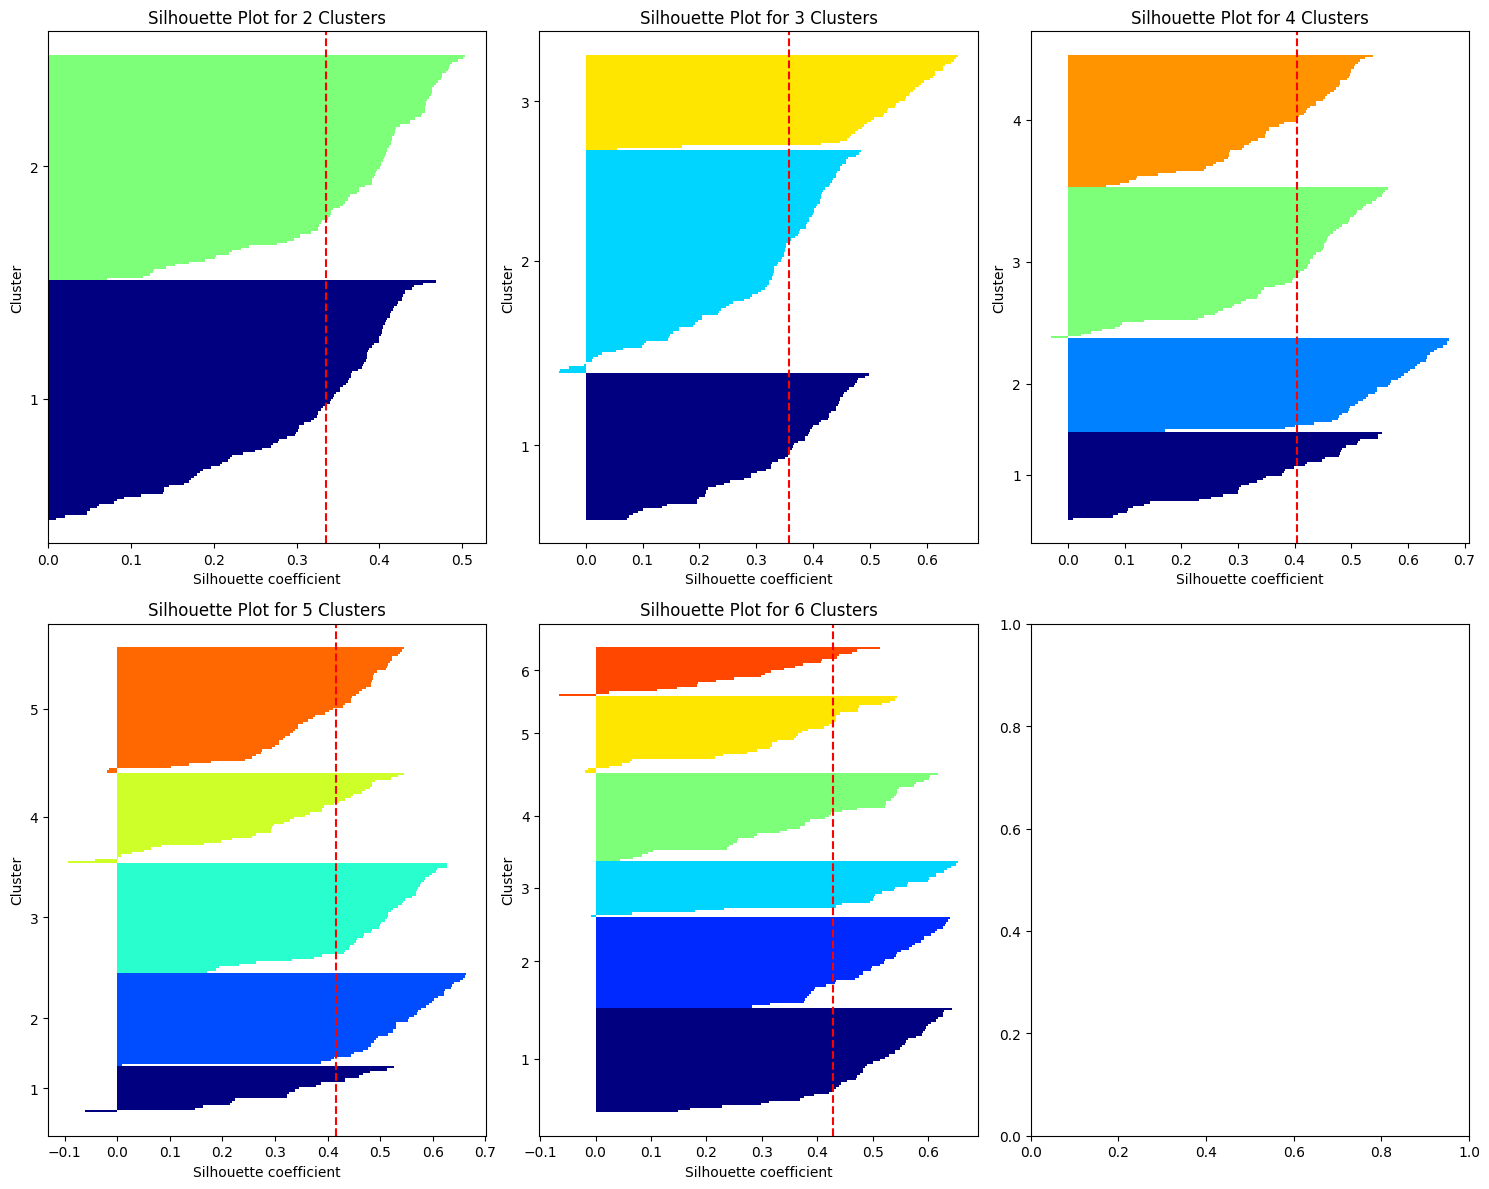

In [9]:
# Assuming you have already defined `scaled_data` and `min_clusters` and `max_clusters`
plot_silhouette_analysis(scaled_data, 2, 6, 3)

In [13]:
n_clusters = 2

# Cluster original data using KMeans
kmeans_original = KMeans(n_clusters=n_clusters, n_init=10)  # Specify the number of clusters
kmeans_original.fit(scaled_data)

# Cluster PCA transformed data using KMeans
kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10)  # Specify the number of clusters
kmeans_pca.fit(pca_data)

KMeans(n_clusters=2, n_init=10)

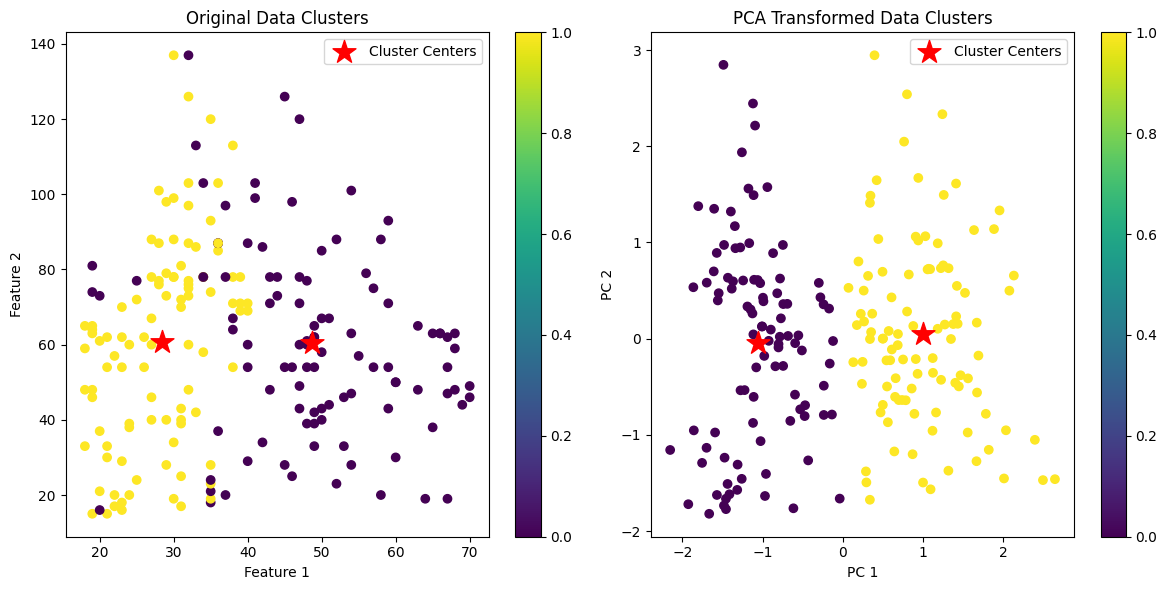

In [14]:
from sklearn.cluster import KMeans

# Plot clusters for original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_original.labels_, cmap='viridis')
plt.scatter(scaler.inverse_transform(kmeans_original.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans_original.cluster_centers_)[:, 1], marker='*', s=300, c='red', label='Cluster Centers')
plt.title('Original Data Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.legend()

# Plot clusters for PCA transformed data
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Cluster Centers')
plt.title('PCA Transformed Data Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()
plt.legend()

plt.tight_layout()
plt.show()

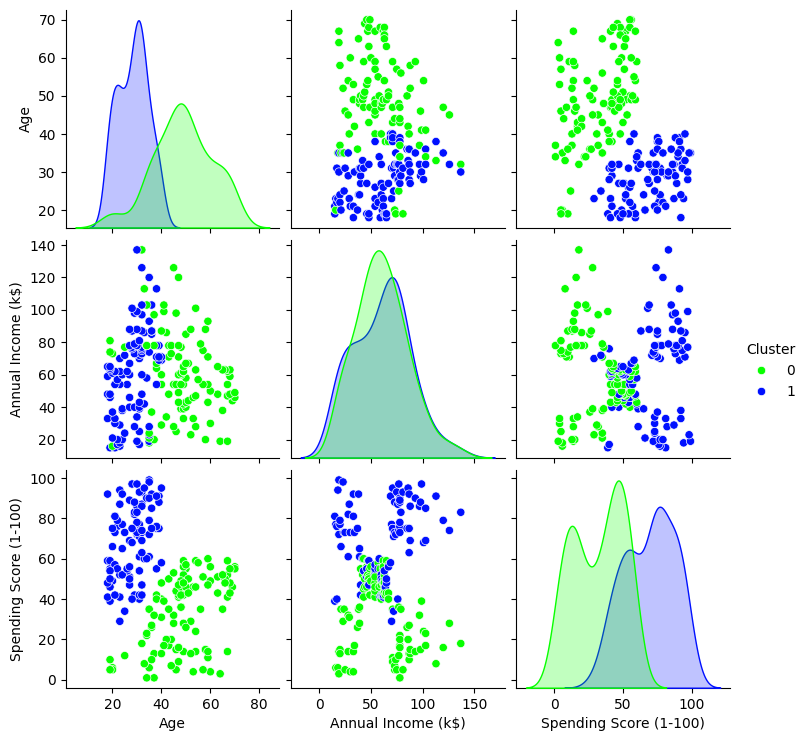

In [19]:
# Get cluster labels for original data
cluster_labels_original = kmeans_original.labels_

# Add cluster labels as a new column in the DataFrame
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = cluster_labels_original

# Get the number of unique cluster labels
num_clusters = len(data_with_clusters['Cluster'].unique())

# Define a custom color palette based on the number of clusters
custom_palette = sns.color_palette('hsv', num_clusters)

# Plot pair plots colored by cluster labels with custom color palette
sns.pairplot(data_with_clusters, hue='Cluster', palette=custom_palette)
plt.show()


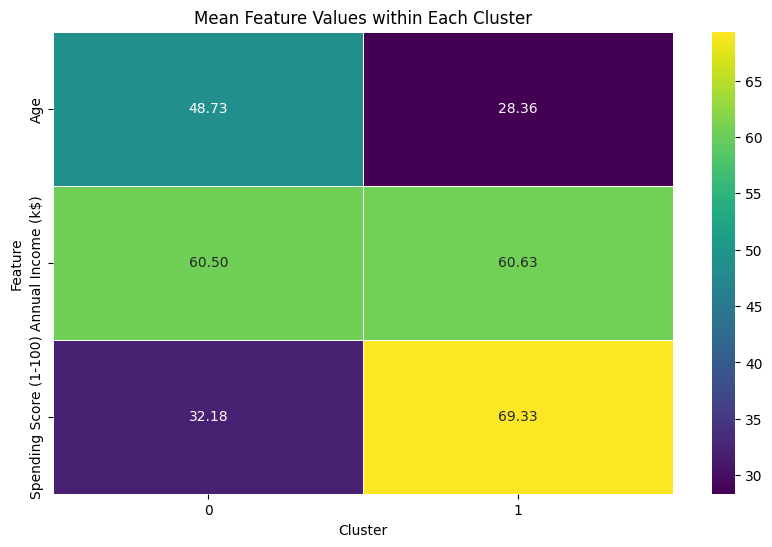

In [20]:
# Get cluster labels for original data
cluster_labels_original = kmeans_original.labels_

# Get cluster centers for original data
cluster_centers_original = scaler.inverse_transform(kmeans_original.cluster_centers_)

# Add cluster labels to original data
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = cluster_labels_original

# Calculate mean values of features within each cluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Plot heatmap of mean feature values within each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Mean Feature Values within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

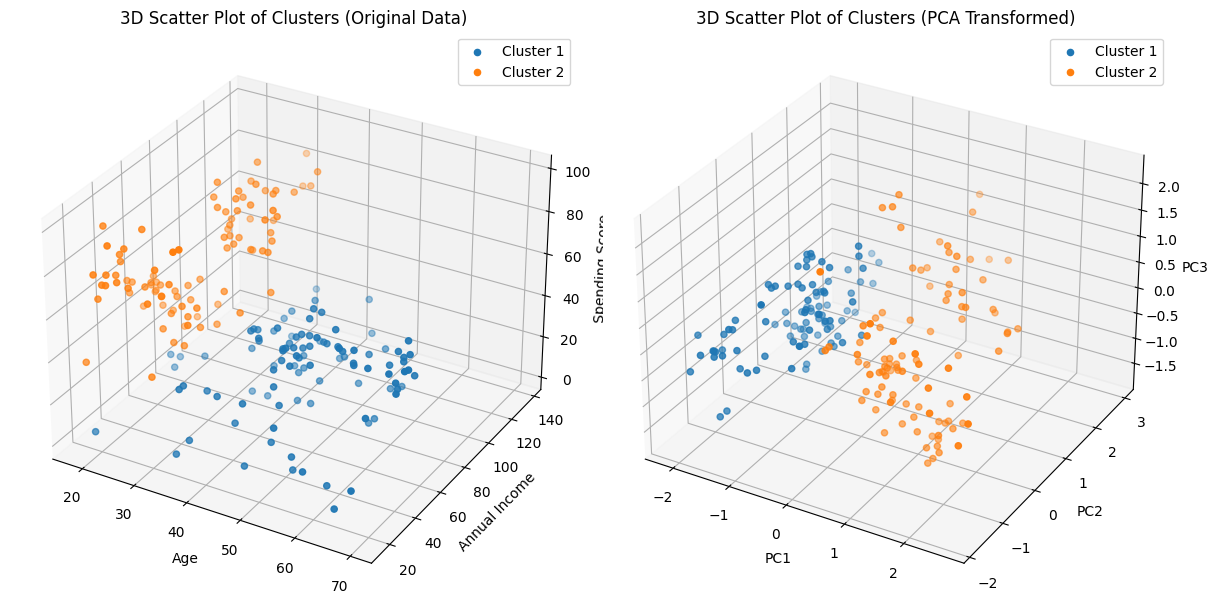

In [21]:
# Get cluster labels for original data
cluster_labels_original = kmeans_original.labels_

# Get cluster labels for PCA-transformed data
cluster_labels_pca = kmeans_pca.labels_

# Create a 3D scatter plot using original data (not PCA-transformed)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

# Loop through each cluster and plot data points
for cluster in range(kmeans_original.n_clusters):
    ax1.scatter(df.iloc[cluster_labels_original == cluster, 0],
                df.iloc[cluster_labels_original == cluster, 1],
                df.iloc[cluster_labels_original == cluster, 2],
                label=f'Cluster {cluster + 1}')

ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income')
ax1.set_zlabel('Spending Score')
ax1.set_title('3D Scatter Plot of Clusters (Original Data)')
ax1.legend()

# Create a 3D scatter plot using PCA-transformed data
ax2 = fig.add_subplot(122, projection='3d')

# Loop through each cluster and plot data points
for cluster in range(kmeans_pca.n_clusters):
    ax2.scatter(pca_data[cluster_labels_pca == cluster, 0],
                pca_data[cluster_labels_pca == cluster, 1],
                pca_data[cluster_labels_pca == cluster, 2],
                label=f'Cluster {cluster + 1}')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('3D Scatter Plot of Clusters (PCA Transformed)')
ax2.legend()

plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Compute silhouette score for original data
silhouette_original = silhouette_score(scaled_data, kmeans_original.labels_)

# Compute Davies-Bouldin index for original data
davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans_original.labels_)

print("Original Data:")
print("Silhouette Score:", silhouette_original)
print("Davies-Bouldin Index:", davies_bouldin_original)

# Compute silhouette score for PCA-transformed data
silhouette_pca = silhouette_score(pca_data, kmeans_pca.labels_)

# Compute Davies-Bouldin index for PCA-transformed data
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_pca.labels_)

print("\nPCA Transformed Data:")
print("Silhouette Score:", silhouette_pca)
print("Davies-Bouldin Index:", davies_bouldin_pca)

Original Data:
Silhouette Score: 0.33547192894004574
Davies-Bouldin Index: 1.2606822880201847

PCA Transformed Data:
Silhouette Score: 0.3354719289400458
Davies-Bouldin Index: 1.2606822880201847
